# 0: Challenge

Use the STL10 dataset and a pretrained ResNet 50 to demonstrate why initial layers are frozen during the first few epochs of transfer learning. Does your model do better or worse when you freeze the initial layers for the first few epochs?

# 1: Data processing
Download the STL10 tar.gz file, upzip and save under DATA_DIR. 
This is based on code from https://github.com/mttk/STL10.

In [1]:
import sys
import os, sys, tarfile, errno
import numpy as np

if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib # ugly but works
else:
    import urllib

try:
    from imageio import imsave
except:
    from scipy.misc import imsave

print(sys.version_info) 

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data & labels
DATA_PATH = './data/stl10_binary/'


def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)
        images = np.reshape(everything, (-1, 3, 96, 96))
        images = np.transpose(images, (0, 3, 2, 1))
        return images

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")
    
def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

def save_images(images, labels, save_path):
    print("Saving images to disk")
    i = 0
    for image in images:
        label = labels[i]
        directory = save_path + str(label) + '/'
        
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1

sys.version_info(major=3, minor=6, micro=13, releaselevel='final', serial=0)


# 1.1 Download the STL10 tar.gz file
Download, unzip and save binary files under DATA_DIR, ./data/ 

In [2]:
download_and_extract()

# 1.2 Extract and save images
Save images into respective folers: ./data/train, ./data/val

In [3]:
# test to check if the whole dataset is read correctly
# read images from binary files
phase = 'train'
images_train = read_all_images(DATA_PATH + 'train' + '_X.bin')
labels_train = read_labels(DATA_PATH + 'train' + '_y.bin')
print(images_train.shape, labels_train.shape)
save_images(images_train, labels_train, DATA_DIR + '/train/')

phase = 'test' #note save direcotry is /val, not /test
images_test = read_all_images(DATA_PATH + 'test' + '_X.bin')
labels_test = read_labels(DATA_PATH + 'test' + '_y.bin')
print(images_test.shape, labels_test.shape)
save_images(images_test, labels_test, DATA_DIR + '/val/')  

(5000, 96, 96, 3) (5000,)
Saving images to disk
./data/train/2/0
./data/train/6/1
./data/train/2/2
./data/train/7/3
./data/train/4/4
./data/train/10/5
./data/train/8/6
./data/train/5/7
./data/train/6/8
./data/train/9/9
./data/train/1/10
./data/train/7/11
./data/train/1/12
./data/train/9/13
./data/train/8/14
./data/train/7/15
./data/train/5/16
./data/train/7/17
./data/train/3/18
./data/train/3/19
./data/train/2/20
./data/train/2/21
./data/train/7/22
./data/train/3/23
./data/train/2/24
./data/train/9/25
./data/train/6/26
./data/train/2/27
./data/train/6/28
./data/train/6/29
./data/train/1/30
./data/train/1/31
./data/train/1/32
./data/train/2/33
./data/train/4/34
./data/train/7/35
./data/train/8/36
./data/train/3/37
./data/train/2/38
./data/train/4/39
./data/train/2/40
./data/train/7/41
./data/train/2/42
./data/train/4/43
./data/train/8/44
./data/train/5/45
./data/train/4/46
./data/train/1/47
./data/train/7/48
./data/train/8/49
./data/train/7/50
./data/train/6/51
./data/train/9/52
./data/

./data/train/4/442
./data/train/3/443
./data/train/1/444
./data/train/6/445
./data/train/9/446
./data/train/8/447
./data/train/9/448
./data/train/9/449
./data/train/6/450
./data/train/6/451
./data/train/6/452
./data/train/9/453
./data/train/8/454
./data/train/4/455
./data/train/10/456
./data/train/2/457
./data/train/10/458
./data/train/2/459
./data/train/1/460
./data/train/7/461
./data/train/4/462
./data/train/7/463
./data/train/2/464
./data/train/7/465
./data/train/1/466
./data/train/6/467
./data/train/3/468
./data/train/8/469
./data/train/8/470
./data/train/2/471
./data/train/9/472
./data/train/7/473
./data/train/8/474
./data/train/7/475
./data/train/4/476
./data/train/8/477
./data/train/1/478
./data/train/10/479
./data/train/2/480
./data/train/9/481
./data/train/6/482
./data/train/9/483
./data/train/9/484
./data/train/10/485
./data/train/5/486
./data/train/1/487
./data/train/10/488
./data/train/2/489
./data/train/6/490
./data/train/3/491
./data/train/5/492
./data/train/4/493
./data/

./data/train/10/884
./data/train/1/885
./data/train/2/886
./data/train/4/887
./data/train/6/888
./data/train/8/889
./data/train/9/890
./data/train/3/891
./data/train/6/892
./data/train/4/893
./data/train/1/894
./data/train/7/895
./data/train/4/896
./data/train/9/897
./data/train/2/898
./data/train/2/899
./data/train/6/900
./data/train/2/901
./data/train/4/902
./data/train/5/903
./data/train/4/904
./data/train/6/905
./data/train/3/906
./data/train/6/907
./data/train/5/908
./data/train/9/909
./data/train/3/910
./data/train/1/911
./data/train/2/912
./data/train/2/913
./data/train/7/914
./data/train/10/915
./data/train/2/916
./data/train/9/917
./data/train/7/918
./data/train/10/919
./data/train/3/920
./data/train/4/921
./data/train/4/922
./data/train/10/923
./data/train/9/924
./data/train/2/925
./data/train/9/926
./data/train/7/927
./data/train/6/928
./data/train/2/929
./data/train/6/930
./data/train/10/931
./data/train/3/932
./data/train/1/933
./data/train/1/934
./data/train/7/935
./data/

./data/train/5/1302
./data/train/10/1303
./data/train/3/1304
./data/train/2/1305
./data/train/9/1306
./data/train/1/1307
./data/train/2/1308
./data/train/7/1309
./data/train/5/1310
./data/train/8/1311
./data/train/7/1312
./data/train/7/1313
./data/train/6/1314
./data/train/3/1315
./data/train/2/1316
./data/train/9/1317
./data/train/10/1318
./data/train/3/1319
./data/train/3/1320
./data/train/9/1321
./data/train/10/1322
./data/train/6/1323
./data/train/7/1324
./data/train/10/1325
./data/train/3/1326
./data/train/9/1327
./data/train/4/1328
./data/train/4/1329
./data/train/5/1330
./data/train/5/1331
./data/train/1/1332
./data/train/9/1333
./data/train/7/1334
./data/train/9/1335
./data/train/9/1336
./data/train/8/1337
./data/train/4/1338
./data/train/4/1339
./data/train/9/1340
./data/train/3/1341
./data/train/5/1342
./data/train/2/1343
./data/train/9/1344
./data/train/5/1345
./data/train/9/1346
./data/train/7/1347
./data/train/3/1348
./data/train/8/1349
./data/train/2/1350
./data/train/9/1

./data/train/4/1724
./data/train/4/1725
./data/train/8/1726
./data/train/5/1727
./data/train/6/1728
./data/train/3/1729
./data/train/7/1730
./data/train/1/1731
./data/train/4/1732
./data/train/8/1733
./data/train/3/1734
./data/train/7/1735
./data/train/1/1736
./data/train/7/1737
./data/train/2/1738
./data/train/10/1739
./data/train/10/1740
./data/train/4/1741
./data/train/3/1742
./data/train/7/1743
./data/train/4/1744
./data/train/2/1745
./data/train/6/1746
./data/train/5/1747
./data/train/3/1748
./data/train/5/1749
./data/train/5/1750
./data/train/10/1751
./data/train/5/1752
./data/train/8/1753
./data/train/1/1754
./data/train/5/1755
./data/train/5/1756
./data/train/4/1757
./data/train/2/1758
./data/train/3/1759
./data/train/8/1760
./data/train/6/1761
./data/train/5/1762
./data/train/8/1763
./data/train/6/1764
./data/train/8/1765
./data/train/1/1766
./data/train/1/1767
./data/train/9/1768
./data/train/7/1769
./data/train/10/1770
./data/train/2/1771
./data/train/10/1772
./data/train/7/

./data/train/9/2151
./data/train/5/2152
./data/train/4/2153
./data/train/6/2154
./data/train/1/2155
./data/train/10/2156
./data/train/3/2157
./data/train/3/2158
./data/train/9/2159
./data/train/5/2160
./data/train/1/2161
./data/train/7/2162
./data/train/2/2163
./data/train/3/2164
./data/train/3/2165
./data/train/1/2166
./data/train/10/2167
./data/train/8/2168
./data/train/5/2169
./data/train/10/2170
./data/train/9/2171
./data/train/4/2172
./data/train/2/2173
./data/train/4/2174
./data/train/9/2175
./data/train/7/2176
./data/train/7/2177
./data/train/5/2178
./data/train/5/2179
./data/train/5/2180
./data/train/7/2181
./data/train/4/2182
./data/train/6/2183
./data/train/2/2184
./data/train/5/2185
./data/train/4/2186
./data/train/7/2187
./data/train/5/2188
./data/train/2/2189
./data/train/8/2190
./data/train/1/2191
./data/train/3/2192
./data/train/5/2193
./data/train/5/2194
./data/train/5/2195
./data/train/1/2196
./data/train/10/2197
./data/train/7/2198
./data/train/1/2199
./data/train/1/2

./data/train/8/2573
./data/train/10/2574
./data/train/10/2575
./data/train/9/2576
./data/train/7/2577
./data/train/1/2578
./data/train/3/2579
./data/train/9/2580
./data/train/9/2581
./data/train/3/2582
./data/train/6/2583
./data/train/3/2584
./data/train/5/2585
./data/train/5/2586
./data/train/10/2587
./data/train/1/2588
./data/train/7/2589
./data/train/1/2590
./data/train/6/2591
./data/train/5/2592
./data/train/5/2593
./data/train/5/2594
./data/train/8/2595
./data/train/8/2596
./data/train/7/2597
./data/train/2/2598
./data/train/4/2599
./data/train/4/2600
./data/train/4/2601
./data/train/10/2602
./data/train/3/2603
./data/train/6/2604
./data/train/10/2605
./data/train/8/2606
./data/train/3/2607
./data/train/8/2608
./data/train/1/2609
./data/train/1/2610
./data/train/7/2611
./data/train/10/2612
./data/train/3/2613
./data/train/9/2614
./data/train/4/2615
./data/train/3/2616
./data/train/9/2617
./data/train/10/2618
./data/train/3/2619
./data/train/9/2620
./data/train/7/2621
./data/train/

./data/train/9/2992
./data/train/2/2993
./data/train/4/2994
./data/train/9/2995
./data/train/8/2996
./data/train/7/2997
./data/train/4/2998
./data/train/7/2999
./data/train/7/3000
./data/train/10/3001
./data/train/3/3002
./data/train/2/3003
./data/train/2/3004
./data/train/3/3005
./data/train/9/3006
./data/train/10/3007
./data/train/8/3008
./data/train/2/3009
./data/train/10/3010
./data/train/5/3011
./data/train/1/3012
./data/train/8/3013
./data/train/2/3014
./data/train/9/3015
./data/train/2/3016
./data/train/10/3017
./data/train/5/3018
./data/train/4/3019
./data/train/10/3020
./data/train/5/3021
./data/train/1/3022
./data/train/5/3023
./data/train/1/3024
./data/train/1/3025
./data/train/2/3026
./data/train/10/3027
./data/train/8/3028
./data/train/10/3029
./data/train/5/3030
./data/train/3/3031
./data/train/7/3032
./data/train/7/3033
./data/train/4/3034
./data/train/2/3035
./data/train/10/3036
./data/train/1/3037
./data/train/1/3038
./data/train/7/3039
./data/train/6/3040
./data/train

./data/train/2/3427
./data/train/4/3428
./data/train/8/3429
./data/train/10/3430
./data/train/8/3431
./data/train/1/3432
./data/train/8/3433
./data/train/3/3434
./data/train/10/3435
./data/train/1/3436
./data/train/9/3437
./data/train/1/3438
./data/train/5/3439
./data/train/5/3440
./data/train/5/3441
./data/train/8/3442
./data/train/8/3443
./data/train/10/3444
./data/train/9/3445
./data/train/3/3446
./data/train/1/3447
./data/train/7/3448
./data/train/2/3449
./data/train/3/3450
./data/train/4/3451
./data/train/2/3452
./data/train/8/3453
./data/train/10/3454
./data/train/4/3455
./data/train/10/3456
./data/train/9/3457
./data/train/7/3458
./data/train/4/3459
./data/train/3/3460
./data/train/4/3461
./data/train/9/3462
./data/train/4/3463
./data/train/10/3464
./data/train/4/3465
./data/train/3/3466
./data/train/3/3467
./data/train/4/3468
./data/train/1/3469
./data/train/1/3470
./data/train/10/3471
./data/train/4/3472
./data/train/7/3473
./data/train/2/3474
./data/train/10/3475
./data/train

./data/train/1/3840
./data/train/3/3841
./data/train/8/3842
./data/train/1/3843
./data/train/8/3844
./data/train/5/3845
./data/train/8/3846
./data/train/3/3847
./data/train/1/3848
./data/train/1/3849
./data/train/4/3850
./data/train/8/3851
./data/train/1/3852
./data/train/1/3853
./data/train/7/3854
./data/train/6/3855
./data/train/7/3856
./data/train/2/3857
./data/train/4/3858
./data/train/1/3859
./data/train/9/3860
./data/train/4/3861
./data/train/7/3862
./data/train/10/3863
./data/train/4/3864
./data/train/8/3865
./data/train/1/3866
./data/train/4/3867
./data/train/2/3868
./data/train/2/3869
./data/train/6/3870
./data/train/5/3871
./data/train/7/3872
./data/train/8/3873
./data/train/5/3874
./data/train/1/3875
./data/train/6/3876
./data/train/2/3877
./data/train/10/3878
./data/train/4/3879
./data/train/5/3880
./data/train/8/3881
./data/train/3/3882
./data/train/7/3883
./data/train/6/3884
./data/train/6/3885
./data/train/5/3886
./data/train/5/3887
./data/train/4/3888
./data/train/2/388

./data/train/4/4271
./data/train/6/4272
./data/train/2/4273
./data/train/3/4274
./data/train/4/4275
./data/train/8/4276
./data/train/10/4277
./data/train/1/4278
./data/train/9/4279
./data/train/2/4280
./data/train/5/4281
./data/train/7/4282
./data/train/1/4283
./data/train/8/4284
./data/train/4/4285
./data/train/7/4286
./data/train/5/4287
./data/train/10/4288
./data/train/6/4289
./data/train/5/4290
./data/train/10/4291
./data/train/3/4292
./data/train/4/4293
./data/train/8/4294
./data/train/1/4295
./data/train/7/4296
./data/train/7/4297
./data/train/8/4298
./data/train/1/4299
./data/train/7/4300
./data/train/10/4301
./data/train/5/4302
./data/train/6/4303
./data/train/6/4304
./data/train/5/4305
./data/train/10/4306
./data/train/5/4307
./data/train/2/4308
./data/train/4/4309
./data/train/1/4310
./data/train/2/4311
./data/train/8/4312
./data/train/3/4313
./data/train/3/4314
./data/train/10/4315
./data/train/9/4316
./data/train/8/4317
./data/train/3/4318
./data/train/2/4319
./data/train/9

./data/train/2/4680
./data/train/10/4681
./data/train/10/4682
./data/train/10/4683
./data/train/5/4684
./data/train/4/4685
./data/train/5/4686
./data/train/1/4687
./data/train/2/4688
./data/train/6/4689
./data/train/2/4690
./data/train/5/4691
./data/train/3/4692
./data/train/9/4693
./data/train/5/4694
./data/train/1/4695
./data/train/10/4696
./data/train/9/4697
./data/train/2/4698
./data/train/5/4699
./data/train/5/4700
./data/train/9/4701
./data/train/2/4702
./data/train/9/4703
./data/train/8/4704
./data/train/10/4705
./data/train/6/4706
./data/train/3/4707
./data/train/7/4708
./data/train/2/4709
./data/train/2/4710
./data/train/5/4711
./data/train/8/4712
./data/train/2/4713
./data/train/6/4714
./data/train/3/4715
./data/train/7/4716
./data/train/6/4717
./data/train/10/4718
./data/train/9/4719
./data/train/4/4720
./data/train/2/4721
./data/train/5/4722
./data/train/1/4723
./data/train/10/4724
./data/train/8/4725
./data/train/7/4726
./data/train/10/4727
./data/train/2/4728
./data/train

./data/val/2/137
./data/val/6/138
./data/val/8/139
./data/val/2/140
./data/val/8/141
./data/val/2/142
./data/val/5/143
./data/val/5/144
./data/val/4/145
./data/val/4/146
./data/val/10/147
./data/val/7/148
./data/val/4/149
./data/val/4/150
./data/val/9/151
./data/val/8/152
./data/val/6/153
./data/val/1/154
./data/val/2/155
./data/val/8/156
./data/val/2/157
./data/val/3/158
./data/val/9/159
./data/val/7/160
./data/val/6/161
./data/val/6/162
./data/val/4/163
./data/val/4/164
./data/val/9/165
./data/val/10/166
./data/val/2/167
./data/val/1/168
./data/val/7/169
./data/val/7/170
./data/val/5/171
./data/val/5/172
./data/val/5/173
./data/val/9/174
./data/val/3/175
./data/val/4/176
./data/val/4/177
./data/val/2/178
./data/val/3/179
./data/val/1/180
./data/val/6/181
./data/val/9/182
./data/val/8/183
./data/val/9/184
./data/val/4/185
./data/val/8/186
./data/val/3/187
./data/val/7/188
./data/val/10/189
./data/val/7/190
./data/val/10/191
./data/val/3/192
./data/val/9/193
./data/val/9/194
./data/val

./data/val/4/618
./data/val/6/619
./data/val/8/620
./data/val/2/621
./data/val/5/622
./data/val/6/623
./data/val/2/624
./data/val/2/625
./data/val/5/626
./data/val/5/627
./data/val/2/628
./data/val/7/629
./data/val/3/630
./data/val/3/631
./data/val/4/632
./data/val/6/633
./data/val/7/634
./data/val/8/635
./data/val/2/636
./data/val/4/637
./data/val/9/638
./data/val/3/639
./data/val/7/640
./data/val/8/641
./data/val/7/642
./data/val/6/643
./data/val/6/644
./data/val/6/645
./data/val/6/646
./data/val/6/647
./data/val/1/648
./data/val/5/649
./data/val/5/650
./data/val/4/651
./data/val/9/652
./data/val/3/653
./data/val/7/654
./data/val/3/655
./data/val/5/656
./data/val/1/657
./data/val/8/658
./data/val/10/659
./data/val/8/660
./data/val/8/661
./data/val/4/662
./data/val/5/663
./data/val/4/664
./data/val/3/665
./data/val/5/666
./data/val/9/667
./data/val/2/668
./data/val/6/669
./data/val/1/670
./data/val/6/671
./data/val/4/672
./data/val/9/673
./data/val/3/674
./data/val/2/675
./data/val/6/

./data/val/9/1105
./data/val/8/1106
./data/val/7/1107
./data/val/5/1108
./data/val/2/1109
./data/val/7/1110
./data/val/5/1111
./data/val/10/1112
./data/val/5/1113
./data/val/8/1114
./data/val/2/1115
./data/val/7/1116
./data/val/9/1117
./data/val/7/1118
./data/val/9/1119
./data/val/2/1120
./data/val/7/1121
./data/val/8/1122
./data/val/1/1123
./data/val/5/1124
./data/val/2/1125
./data/val/10/1126
./data/val/4/1127
./data/val/3/1128
./data/val/9/1129
./data/val/8/1130
./data/val/2/1131
./data/val/6/1132
./data/val/9/1133
./data/val/5/1134
./data/val/1/1135
./data/val/6/1136
./data/val/9/1137
./data/val/6/1138
./data/val/8/1139
./data/val/4/1140
./data/val/6/1141
./data/val/2/1142
./data/val/7/1143
./data/val/1/1144
./data/val/8/1145
./data/val/3/1146
./data/val/8/1147
./data/val/3/1148
./data/val/5/1149
./data/val/1/1150
./data/val/6/1151
./data/val/5/1152
./data/val/7/1153
./data/val/7/1154
./data/val/6/1155
./data/val/8/1156
./data/val/7/1157
./data/val/4/1158
./data/val/6/1159
./data/v

./data/val/1/1575
./data/val/1/1576
./data/val/7/1577
./data/val/4/1578
./data/val/8/1579
./data/val/3/1580
./data/val/6/1581
./data/val/5/1582
./data/val/2/1583
./data/val/1/1584
./data/val/10/1585
./data/val/3/1586
./data/val/4/1587
./data/val/2/1588
./data/val/4/1589
./data/val/9/1590
./data/val/2/1591
./data/val/5/1592
./data/val/8/1593
./data/val/4/1594
./data/val/8/1595
./data/val/1/1596
./data/val/9/1597
./data/val/5/1598
./data/val/10/1599
./data/val/6/1600
./data/val/8/1601
./data/val/7/1602
./data/val/3/1603
./data/val/6/1604
./data/val/5/1605
./data/val/7/1606
./data/val/8/1607
./data/val/8/1608
./data/val/2/1609
./data/val/7/1610
./data/val/5/1611
./data/val/5/1612
./data/val/3/1613
./data/val/9/1614
./data/val/8/1615
./data/val/9/1616
./data/val/2/1617
./data/val/6/1618
./data/val/8/1619
./data/val/6/1620
./data/val/8/1621
./data/val/4/1622
./data/val/3/1623
./data/val/9/1624
./data/val/5/1625
./data/val/6/1626
./data/val/8/1627
./data/val/9/1628
./data/val/8/1629
./data/v

./data/val/3/2033
./data/val/3/2034
./data/val/9/2035
./data/val/10/2036
./data/val/8/2037
./data/val/9/2038
./data/val/9/2039
./data/val/10/2040
./data/val/6/2041
./data/val/5/2042
./data/val/1/2043
./data/val/2/2044
./data/val/4/2045
./data/val/6/2046
./data/val/9/2047
./data/val/1/2048
./data/val/5/2049
./data/val/2/2050
./data/val/6/2051
./data/val/2/2052
./data/val/2/2053
./data/val/4/2054
./data/val/9/2055
./data/val/8/2056
./data/val/10/2057
./data/val/9/2058
./data/val/9/2059
./data/val/5/2060
./data/val/6/2061
./data/val/10/2062
./data/val/8/2063
./data/val/5/2064
./data/val/10/2065
./data/val/4/2066
./data/val/7/2067
./data/val/7/2068
./data/val/4/2069
./data/val/2/2070
./data/val/7/2071
./data/val/3/2072
./data/val/6/2073
./data/val/9/2074
./data/val/10/2075
./data/val/10/2076
./data/val/3/2077
./data/val/3/2078
./data/val/2/2079
./data/val/2/2080
./data/val/6/2081
./data/val/3/2082
./data/val/10/2083
./data/val/5/2084
./data/val/1/2085
./data/val/4/2086
./data/val/8/2087
./

./data/val/3/2511
./data/val/8/2512
./data/val/7/2513
./data/val/1/2514
./data/val/4/2515
./data/val/4/2516
./data/val/5/2517
./data/val/1/2518
./data/val/2/2519
./data/val/4/2520
./data/val/5/2521
./data/val/1/2522
./data/val/2/2523
./data/val/4/2524
./data/val/5/2525
./data/val/9/2526
./data/val/2/2527
./data/val/8/2528
./data/val/4/2529
./data/val/6/2530
./data/val/9/2531
./data/val/4/2532
./data/val/1/2533
./data/val/10/2534
./data/val/10/2535
./data/val/4/2536
./data/val/6/2537
./data/val/5/2538
./data/val/4/2539
./data/val/4/2540
./data/val/8/2541
./data/val/2/2542
./data/val/2/2543
./data/val/2/2544
./data/val/4/2545
./data/val/7/2546
./data/val/10/2547
./data/val/5/2548
./data/val/7/2549
./data/val/7/2550
./data/val/10/2551
./data/val/5/2552
./data/val/9/2553
./data/val/5/2554
./data/val/8/2555
./data/val/8/2556
./data/val/6/2557
./data/val/7/2558
./data/val/9/2559
./data/val/4/2560
./data/val/7/2561
./data/val/9/2562
./data/val/4/2563
./data/val/7/2564
./data/val/7/2565
./data

./data/val/8/2982
./data/val/9/2983
./data/val/7/2984
./data/val/8/2985
./data/val/3/2986
./data/val/8/2987
./data/val/2/2988
./data/val/5/2989
./data/val/10/2990
./data/val/9/2991
./data/val/4/2992
./data/val/9/2993
./data/val/7/2994
./data/val/10/2995
./data/val/3/2996
./data/val/8/2997
./data/val/7/2998
./data/val/10/2999
./data/val/5/3000
./data/val/5/3001
./data/val/10/3002
./data/val/5/3003
./data/val/6/3004
./data/val/1/3005
./data/val/7/3006
./data/val/3/3007
./data/val/6/3008
./data/val/9/3009
./data/val/8/3010
./data/val/7/3011
./data/val/5/3012
./data/val/2/3013
./data/val/10/3014
./data/val/9/3015
./data/val/3/3016
./data/val/5/3017
./data/val/3/3018
./data/val/10/3019
./data/val/3/3020
./data/val/8/3021
./data/val/1/3022
./data/val/4/3023
./data/val/3/3024
./data/val/1/3025
./data/val/7/3026
./data/val/6/3027
./data/val/4/3028
./data/val/8/3029
./data/val/9/3030
./data/val/5/3031
./data/val/8/3032
./data/val/2/3033
./data/val/5/3034
./data/val/2/3035
./data/val/3/3036
./da

./data/val/1/3455
./data/val/8/3456
./data/val/10/3457
./data/val/5/3458
./data/val/2/3459
./data/val/7/3460
./data/val/1/3461
./data/val/2/3462
./data/val/6/3463
./data/val/7/3464
./data/val/9/3465
./data/val/2/3466
./data/val/8/3467
./data/val/4/3468
./data/val/1/3469
./data/val/1/3470
./data/val/10/3471
./data/val/5/3472
./data/val/10/3473
./data/val/7/3474
./data/val/7/3475
./data/val/7/3476
./data/val/9/3477
./data/val/9/3478
./data/val/9/3479
./data/val/2/3480
./data/val/5/3481
./data/val/5/3482
./data/val/10/3483
./data/val/5/3484
./data/val/3/3485
./data/val/9/3486
./data/val/1/3487
./data/val/1/3488
./data/val/10/3489
./data/val/6/3490
./data/val/2/3491
./data/val/1/3492
./data/val/10/3493
./data/val/7/3494
./data/val/5/3495
./data/val/10/3496
./data/val/4/3497
./data/val/7/3498
./data/val/6/3499
./data/val/1/3500
./data/val/7/3501
./data/val/5/3502
./data/val/5/3503
./data/val/5/3504
./data/val/7/3505
./data/val/6/3506
./data/val/10/3507
./data/val/8/3508
./data/val/6/3509
./

./data/val/4/3914
./data/val/1/3915
./data/val/3/3916
./data/val/10/3917
./data/val/2/3918
./data/val/1/3919
./data/val/10/3920
./data/val/2/3921
./data/val/9/3922
./data/val/1/3923
./data/val/1/3924
./data/val/3/3925
./data/val/7/3926
./data/val/3/3927
./data/val/5/3928
./data/val/2/3929
./data/val/2/3930
./data/val/1/3931
./data/val/5/3932
./data/val/8/3933
./data/val/3/3934
./data/val/6/3935
./data/val/6/3936
./data/val/2/3937
./data/val/4/3938
./data/val/10/3939
./data/val/1/3940
./data/val/3/3941
./data/val/10/3942
./data/val/9/3943
./data/val/3/3944
./data/val/5/3945
./data/val/2/3946
./data/val/10/3947
./data/val/9/3948
./data/val/9/3949
./data/val/6/3950
./data/val/9/3951
./data/val/8/3952
./data/val/10/3953
./data/val/9/3954
./data/val/9/3955
./data/val/8/3956
./data/val/2/3957
./data/val/7/3958
./data/val/8/3959
./data/val/4/3960
./data/val/6/3961
./data/val/7/3962
./data/val/7/3963
./data/val/5/3964
./data/val/1/3965
./data/val/10/3966
./data/val/8/3967
./data/val/3/3968
./d

./data/val/5/4368
./data/val/7/4369
./data/val/5/4370
./data/val/8/4371
./data/val/4/4372
./data/val/8/4373
./data/val/9/4374
./data/val/1/4375
./data/val/10/4376
./data/val/2/4377
./data/val/8/4378
./data/val/5/4379
./data/val/9/4380
./data/val/8/4381
./data/val/9/4382
./data/val/4/4383
./data/val/5/4384
./data/val/1/4385
./data/val/4/4386
./data/val/2/4387
./data/val/5/4388
./data/val/3/4389
./data/val/3/4390
./data/val/9/4391
./data/val/8/4392
./data/val/7/4393
./data/val/1/4394
./data/val/2/4395
./data/val/3/4396
./data/val/7/4397
./data/val/10/4398
./data/val/1/4399
./data/val/4/4400
./data/val/5/4401
./data/val/5/4402
./data/val/8/4403
./data/val/7/4404
./data/val/4/4405
./data/val/3/4406
./data/val/4/4407
./data/val/3/4408
./data/val/10/4409
./data/val/2/4410
./data/val/7/4411
./data/val/6/4412
./data/val/1/4413
./data/val/7/4414
./data/val/4/4415
./data/val/7/4416
./data/val/6/4417
./data/val/3/4418
./data/val/6/4419
./data/val/5/4420
./data/val/7/4421
./data/val/8/4422
./data/

./data/val/1/4848
./data/val/6/4849
./data/val/6/4850
./data/val/1/4851
./data/val/3/4852
./data/val/5/4853
./data/val/10/4854
./data/val/6/4855
./data/val/4/4856
./data/val/4/4857
./data/val/4/4858
./data/val/8/4859
./data/val/4/4860
./data/val/6/4861
./data/val/6/4862
./data/val/7/4863
./data/val/8/4864
./data/val/9/4865
./data/val/7/4866
./data/val/9/4867
./data/val/3/4868
./data/val/7/4869
./data/val/6/4870
./data/val/1/4871
./data/val/7/4872
./data/val/6/4873
./data/val/5/4874
./data/val/7/4875
./data/val/9/4876
./data/val/3/4877
./data/val/5/4878
./data/val/1/4879
./data/val/7/4880
./data/val/4/4881
./data/val/4/4882
./data/val/2/4883
./data/val/1/4884
./data/val/6/4885
./data/val/3/4886
./data/val/8/4887
./data/val/6/4888
./data/val/3/4889
./data/val/1/4890
./data/val/7/4891
./data/val/10/4892
./data/val/1/4893
./data/val/8/4894
./data/val/7/4895
./data/val/2/4896
./data/val/4/4897
./data/val/1/4898
./data/val/4/4899
./data/val/1/4900
./data/val/8/4901
./data/val/9/4902
./data/v

./data/val/4/5305
./data/val/5/5306
./data/val/5/5307
./data/val/4/5308
./data/val/7/5309
./data/val/1/5310
./data/val/5/5311
./data/val/10/5312
./data/val/7/5313
./data/val/5/5314
./data/val/7/5315
./data/val/2/5316
./data/val/10/5317
./data/val/3/5318
./data/val/5/5319
./data/val/9/5320
./data/val/9/5321
./data/val/5/5322
./data/val/1/5323
./data/val/6/5324
./data/val/10/5325
./data/val/10/5326
./data/val/3/5327
./data/val/2/5328
./data/val/10/5329
./data/val/2/5330
./data/val/10/5331
./data/val/6/5332
./data/val/3/5333
./data/val/2/5334
./data/val/1/5335
./data/val/7/5336
./data/val/6/5337
./data/val/5/5338
./data/val/6/5339
./data/val/9/5340
./data/val/2/5341
./data/val/10/5342
./data/val/10/5343
./data/val/5/5344
./data/val/2/5345
./data/val/4/5346
./data/val/3/5347
./data/val/10/5348
./data/val/2/5349
./data/val/2/5350
./data/val/1/5351
./data/val/7/5352
./data/val/9/5353
./data/val/7/5354
./data/val/8/5355
./data/val/10/5356
./data/val/4/5357
./data/val/4/5358
./data/val/2/5359


./data/val/7/5777
./data/val/1/5778
./data/val/7/5779
./data/val/6/5780
./data/val/7/5781
./data/val/7/5782
./data/val/2/5783
./data/val/6/5784
./data/val/1/5785
./data/val/10/5786
./data/val/4/5787
./data/val/10/5788
./data/val/5/5789
./data/val/2/5790
./data/val/8/5791
./data/val/8/5792
./data/val/6/5793
./data/val/6/5794
./data/val/9/5795
./data/val/3/5796
./data/val/10/5797
./data/val/10/5798
./data/val/10/5799
./data/val/6/5800
./data/val/10/5801
./data/val/8/5802
./data/val/9/5803
./data/val/5/5804
./data/val/3/5805
./data/val/8/5806
./data/val/9/5807
./data/val/8/5808
./data/val/1/5809
./data/val/4/5810
./data/val/8/5811
./data/val/7/5812
./data/val/8/5813
./data/val/6/5814
./data/val/2/5815
./data/val/9/5816
./data/val/3/5817
./data/val/10/5818
./data/val/8/5819
./data/val/3/5820
./data/val/8/5821
./data/val/4/5822
./data/val/6/5823
./data/val/3/5824
./data/val/4/5825
./data/val/8/5826
./data/val/7/5827
./data/val/10/5828
./data/val/6/5829
./data/val/2/5830
./data/val/1/5831
./

./data/val/10/6256
./data/val/4/6257
./data/val/5/6258
./data/val/7/6259
./data/val/4/6260
./data/val/5/6261
./data/val/5/6262
./data/val/2/6263
./data/val/3/6264
./data/val/6/6265
./data/val/7/6266
./data/val/7/6267
./data/val/3/6268
./data/val/6/6269
./data/val/8/6270
./data/val/3/6271
./data/val/1/6272
./data/val/3/6273
./data/val/9/6274
./data/val/1/6275
./data/val/6/6276
./data/val/9/6277
./data/val/6/6278
./data/val/10/6279
./data/val/2/6280
./data/val/8/6281
./data/val/2/6282
./data/val/10/6283
./data/val/3/6284
./data/val/7/6285
./data/val/9/6286
./data/val/4/6287
./data/val/5/6288
./data/val/5/6289
./data/val/9/6290
./data/val/3/6291
./data/val/1/6292
./data/val/10/6293
./data/val/6/6294
./data/val/1/6295
./data/val/3/6296
./data/val/3/6297
./data/val/6/6298
./data/val/8/6299
./data/val/7/6300
./data/val/8/6301
./data/val/9/6302
./data/val/9/6303
./data/val/7/6304
./data/val/4/6305
./data/val/10/6306
./data/val/6/6307
./data/val/9/6308
./data/val/7/6309
./data/val/10/6310
./da

./data/val/6/6719
./data/val/8/6720
./data/val/10/6721
./data/val/1/6722
./data/val/5/6723
./data/val/4/6724
./data/val/8/6725
./data/val/8/6726
./data/val/8/6727
./data/val/4/6728
./data/val/6/6729
./data/val/10/6730
./data/val/4/6731
./data/val/3/6732
./data/val/2/6733
./data/val/5/6734
./data/val/1/6735
./data/val/7/6736
./data/val/5/6737
./data/val/3/6738
./data/val/2/6739
./data/val/3/6740
./data/val/7/6741
./data/val/3/6742
./data/val/2/6743
./data/val/9/6744
./data/val/7/6745
./data/val/7/6746
./data/val/10/6747
./data/val/1/6748
./data/val/2/6749
./data/val/5/6750
./data/val/4/6751
./data/val/9/6752
./data/val/10/6753
./data/val/7/6754
./data/val/4/6755
./data/val/7/6756
./data/val/9/6757
./data/val/10/6758
./data/val/4/6759
./data/val/1/6760
./data/val/2/6761
./data/val/1/6762
./data/val/5/6763
./data/val/9/6764
./data/val/9/6765
./data/val/10/6766
./data/val/6/6767
./data/val/1/6768
./data/val/5/6769
./data/val/2/6770
./data/val/7/6771
./data/val/8/6772
./data/val/3/6773
./da

./data/val/5/7189
./data/val/2/7190
./data/val/2/7191
./data/val/3/7192
./data/val/10/7193
./data/val/3/7194
./data/val/3/7195
./data/val/6/7196
./data/val/10/7197
./data/val/7/7198
./data/val/4/7199
./data/val/4/7200
./data/val/2/7201
./data/val/2/7202
./data/val/3/7203
./data/val/5/7204
./data/val/9/7205
./data/val/5/7206
./data/val/6/7207
./data/val/7/7208
./data/val/1/7209
./data/val/8/7210
./data/val/7/7211
./data/val/9/7212
./data/val/5/7213
./data/val/3/7214
./data/val/7/7215
./data/val/3/7216
./data/val/2/7217
./data/val/4/7218
./data/val/8/7219
./data/val/7/7220
./data/val/4/7221
./data/val/10/7222
./data/val/8/7223
./data/val/6/7224
./data/val/1/7225
./data/val/5/7226
./data/val/7/7227
./data/val/2/7228
./data/val/2/7229
./data/val/1/7230
./data/val/5/7231
./data/val/4/7232
./data/val/6/7233
./data/val/9/7234
./data/val/10/7235
./data/val/6/7236
./data/val/10/7237
./data/val/4/7238
./data/val/7/7239
./data/val/9/7240
./data/val/8/7241
./data/val/6/7242
./data/val/5/7243
./dat

./data/val/1/7659
./data/val/8/7660
./data/val/5/7661
./data/val/7/7662
./data/val/8/7663
./data/val/5/7664
./data/val/5/7665
./data/val/10/7666
./data/val/4/7667
./data/val/7/7668
./data/val/8/7669
./data/val/7/7670
./data/val/10/7671
./data/val/6/7672
./data/val/9/7673
./data/val/1/7674
./data/val/10/7675
./data/val/3/7676
./data/val/2/7677
./data/val/7/7678
./data/val/7/7679
./data/val/8/7680
./data/val/9/7681
./data/val/3/7682
./data/val/4/7683
./data/val/3/7684
./data/val/4/7685
./data/val/4/7686
./data/val/1/7687
./data/val/8/7688
./data/val/6/7689
./data/val/5/7690
./data/val/9/7691
./data/val/5/7692
./data/val/10/7693
./data/val/10/7694
./data/val/8/7695
./data/val/8/7696
./data/val/3/7697
./data/val/10/7698
./data/val/5/7699
./data/val/8/7700
./data/val/10/7701
./data/val/4/7702
./data/val/10/7703
./data/val/5/7704
./data/val/10/7705
./data/val/6/7706
./data/val/1/7707
./data/val/1/7708
./data/val/3/7709
./data/val/6/7710
./data/val/3/7711
./data/val/10/7712
./data/val/4/7713


# 2: Model training and testing

In [4]:
# License: BSD

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

# 2.1: Create dataloader to for model inputs

In [5]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,
                                             shuffle=True)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# 2.2: Display a batch of training images

['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']


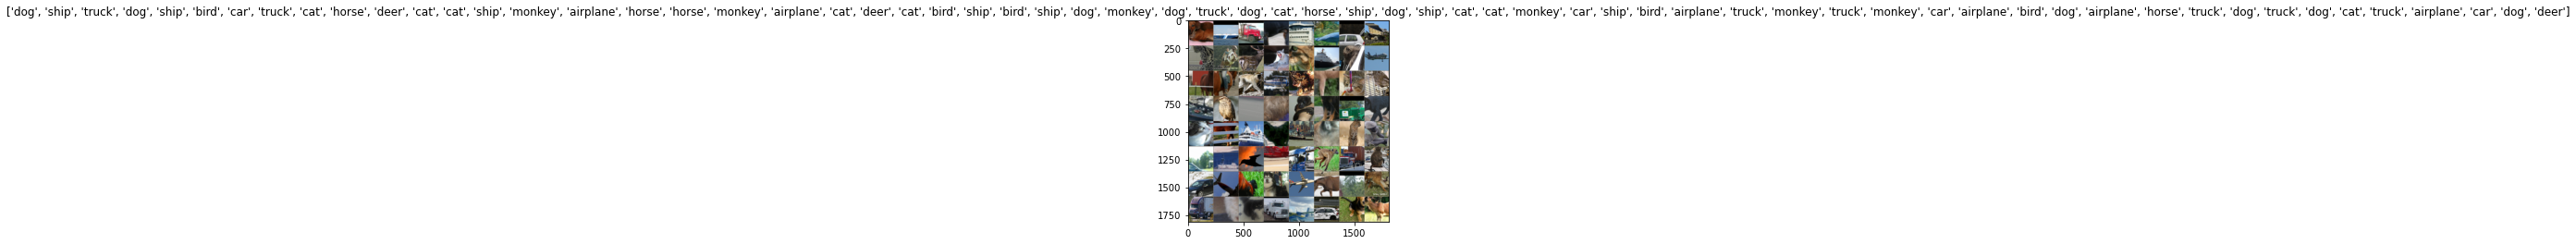

In [6]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.close()
    
# read class names, this is zero based
f = open("./data/stl10_binary/class_names.txt")
class_des = f.read().split("\n")[:-1]
    
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

# map class_names (1-10) to class_des (0 based)
imshow(out, title=[class_des[int(class_names[x])-1] for x in classes])

# 2.3: Model training
Add logic to allow user to selectively freeze/unfreeze depending on epoch and layer. Store result of each run into a csv file for future data plotting and analysis


In [7]:
# train model
def train_model(model, criterion, optimizer, scheduler, num_epochs, run_option):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    c_names =[name for name, child in model.named_children()]
    epoch_freeze = run_option[0]  # number of epochs to freeze
    depth_unfreeze = run_option[1] # model depth from top to unfreeze, with fc as 1
    
    # empty numpy array of hold results, 4 rows
    # first column to distinguish training_loss, training_acc, val_loss, val_acc
    # second & third columns to hold run_option data
    results_data = np.empty((4, num_epochs+3))
    results_data[:, 0]= [0,1,2,3] 
    results_data[:, 1]= epoch_freeze
    results_data[:, 2]= depth_unfreeze

    for epoch in range(num_epochs):
        et = time.time()
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        # based on run_option to set which epoch & which layer to freeze/unfreeze
        if epoch < epoch_freeze:
            
            for name, child in model.named_children():
                if name in c_names[-1:]:
                    for param in child.parameters():
                        param.requires_grad = True
                else:
                    for param in child.parameters():
                        param.requires_grad = False
                
        else:
            
            for name, child in model.named_children():
                if name in c_names[-depth_unfreeze:]:
                    for param in child.parameters():
                        param.requires_grad = True
                
                else:
                    for param in child.parameters():
                        param.requires_grad = False
                
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            if phase == 'train':
                scheduler.step()
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            print('epoch time ', time.time()-et)

            if phase == 'train':
                results_data[0, epoch+3] = epoch_loss
                results_data[1, epoch+3] = epoch_acc
            else:
                results_data[2, epoch+3] = epoch_loss
                results_data[3, epoch+3] = epoch_acc

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()
       
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    
    return (model, results_data)
    
# visualize model output

def visualize_model(model):
    num_images=6
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

# 2.4: load the pretrained resnet50 model
Create a run option matrix allow user to enter different configuations as desired. 
For each run, load the pretained model and replace the fully connected layer to begin.

In [8]:
# Resnet50 model has 10 named_children shown below from bottom to top 
#['conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer2', 'layer3', 'layer4', 'avgpool', 'fc']
# some named_children (relu, maxpool, avgpool) do not have trainable parameters

# train and eval with the various options: 
# use a tuple consisting of 2 arguments to select how the model should be run
# first argument represent the number of epochs to freeze
# second argument represent the number of named_children to unfreeze from top 
# for example: 1 indicates to unfreeze fc, and 3 indicates to unfreeze layer4, avgpool and fc

# First, I did 17 runs for 5 epochs (results saved in plot_data_1.csv)
# (num_epoch, 1): use as feature extractor, ie, unfreeze the FC layer which is the first named_child from top
# (0, 10): finetuning, ie, unfreeze for every epoch and for entire model
# (1,10), (2,10), (3,10): freeze for 1,2,3 epochs before unfreeze entire model
# (1,3), (1,4), (1,5), (1,6): freezing model for 1 epoch, then unfreeze from FC layer to n named_child below
# (2,3), (2,4), (2,5), (2,6): freezing model for 2 epochs, then unfreeze from FC layer to n named_child below
# (3,3), (3,4), (3,5), (3,6): freezing model for 3 epochs, then unfreeze from FC layer to n named_child below
# (please note that 'avgpool' has no trainable parameters, hence skipped)

'''
num_epochs = 5
run_option_matrix = [(num_epochs,1),
                    (0,10), (1,10), (2,10), (3,10),
                    (1,3), (1,4), (1,5), (1,6),
                    (2,3), (2,4), (2,5), (2,6),
                    (3,3), (3,4), (3,5), (3,6)]
'''

# Second, I did 4 runs for 15 epochs (results saved in plot_data_2.csv)
# consisting of 3 highest performaing configuations (1,5),(1,6),(2,6) and finetuning. 

'''
num_epochs = 15
run_option_matrix = [(1,5),(1,6), (2,6), (0,10)]
'''
# user can configure the run_option_matrix as shown below

num_epochs = 5 
run_option_matrix = []

f = open(r'./plot_data.csv', 'a')

for i in range(len(run_option_matrix)):
        
    model_ft = models.resnet50(pretrained=True)

    # Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
    num_ftrs = model_ft.fc.in_features
    
    # replace the fc layer
    model_ft.fc = nn.Linear(num_ftrs, 10)

    model_ft = model_ft.to(device)

    criterion = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    #optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
    optimizer_ft = optim.SGD(filter(lambda p: p.requires_grad, model_ft.parameters()), lr=0.001, momentum=0.9)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    run_option = run_option_matrix[i]
    print('currently on run_option ', run_option)

    model_ft_done, result_data =train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs, run_option)
    
    np.savetxt(f, result_data, delimiter=",")

f.close()

currently on run_option  (2, 1)
Epoch 0/1
----------
train Loss: 1.4590 Acc: 0.6550
epoch time  45.822394609451294
val Loss: 0.6824 Acc: 0.9228
epoch time  118.34990644454956

Epoch 1/1
----------
train Loss: 0.7518 Acc: 0.8400
epoch time  45.966888189315796
val Loss: 0.4317 Acc: 0.9284
epoch time  118.5278627872467

Training complete in 3m 57s
Best val Acc: 0.928375
currently on run_option  (0, 10)
Epoch 0/1
----------
train Loss: 1.2530 Acc: 0.6818
epoch time  113.5631365776062
val Loss: 0.3263 Acc: 0.9334
epoch time  184.9317922592163

Epoch 1/1
----------
train Loss: 0.4270 Acc: 0.8772
epoch time  114.00737762451172
val Loss: 0.2156 Acc: 0.9406
epoch time  184.47907662391663

Training complete in 6m 9s
Best val Acc: 0.940625


# 2.5: Plot results 

In [9]:
# function to generate summary plots for the run

def data_plot(data, period, title):
    
    plt.figure(figsize=(10,5))
    
    l_label=['training_loss', 'training_acc', 'val_loss', 'val_acc']
    
    lines = [plt.plot(d[3:], label="({}, freeze {} epochs, unfreeze depth of {})".format(l_label[int(d[0])], int(d[1]), int(d[2]))) for d in data]
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.xlim(0, period-1)
    #plt.ylim(0.96, .98)
    
    plt.title(title)
    plt.xlabel('epoch')
    plt.show()

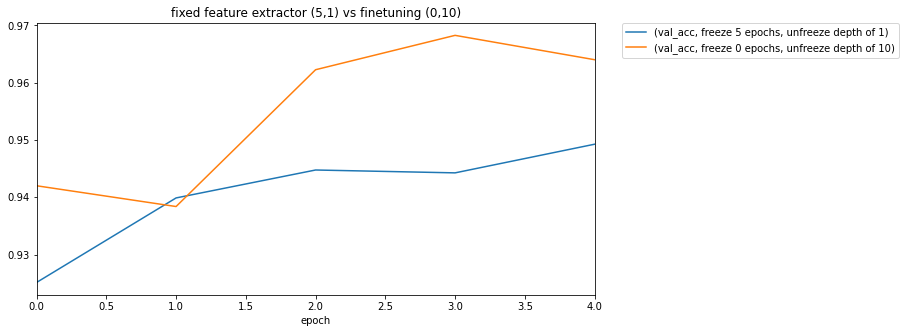

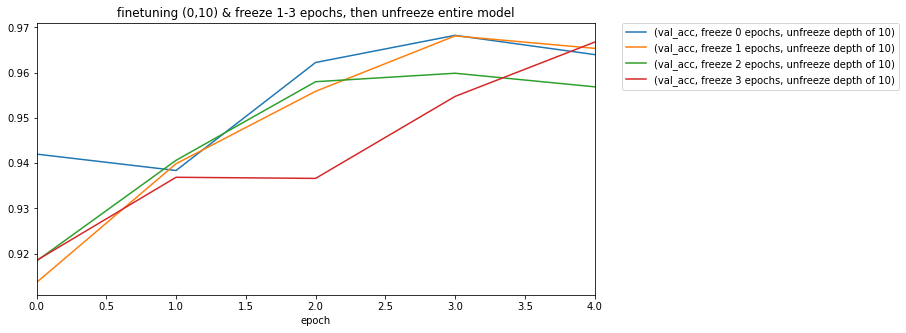

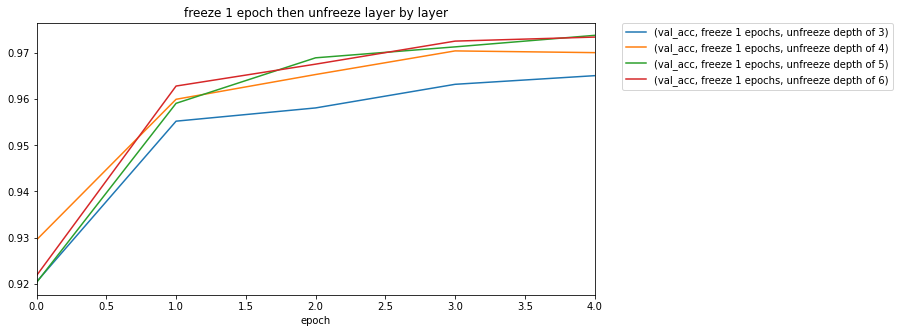

In [12]:
#read from csv file with data from past runs

# plot_data_1.csv contains 5 epochs of following 17 configuations  
# (num_epochs,1),
# (0,10), (1,10), (2,10), (3,10),
# (1,3), (1,4), (1,5), (1,6)
# (2,3), (2,4), (2,5), (2,6),
# (3,3), (3,4), (3,5), (3,6)

plot_data_1 = np.genfromtxt(r'./plot_data_1.csv', delimiter=',', dtype=None)

# plot_data_2.csv contains 15 epochs of following 4 configuations  
# (1,5),(1,6),(2,6), (0,10)                  
plot_data_2 = np.genfromtxt(r'./plot_data_2.csv', delimiter=',', dtype=None)

#each run generate 4 rows of data. Data type can be identified by column 0: (0 training_loss, 1 training_acc, 2 val_loss, 3 val_acc)
#each run option can be identified by entries in column 1 (epoch to freeze) and column 2 (layers to unfreeze)

# k is a list containing rows of interest, use numpy slice to get rows and pass rows along with applicable title
# val acc plot of feature extration & finetuning
k=[3,7]
plot_title= 'fixed feature extractor (5,1) vs finetuning (0,10)'
data_plot(plot_data_1[k,:], 5, plot_title)

# val acc plot of freezing 1-3 epochs and finetuning
k=[7,11,15,19]
plot_title = 'finetuning (0,10) & freeze 1-3 epochs, then unfreeze entire model'
data_plot(plot_data_1[k,:], 5, plot_title)

# val acc plot of freeze 1 epoch and unfreeze layer by layer
k=[23,27,31,35]
plot_title = 'freeze 1 epoch then unfreeze layer by layer'
data_plot(plot_data_1[k,:], 5, plot_title)

First plot shows performance of feature extraction vs finetuning. Finetuning achieves better performance.
Second plot shows performance of freezing for 1,2,3 epochs then unfreeze entire model, compared agasint finetuning.
Third plot shows freezing one epoch, then unfreeze various layers. Some configurations show better performance than finetuning.

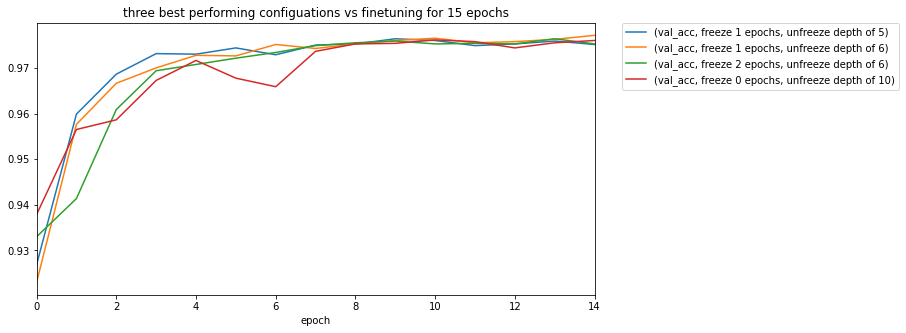

In [21]:
# training and val acc plot
k=[3,7,11,15]
plot_title = 'three best performing configuations vs finetuning for 15 epochs'
data_plot(plot_data_2[k,:], 15, plot_title)


This plots shows three best performing configurations and their performance against finetuning over 15 epochs. These configuations can achieve peak performance comparable to finetuning, but with less computational time.

These configuations are freezing 1 or 2 epochs and then unfreeze to depth of 5 or 6, which corresponds to 'layer 2' and 'layer1' of resnet50 (based on named_children). (I am counting this from 'fc' as the top layer, and going progressively lower into the model.)

# 3.0: Summary

Several configuations of freezing first few epochs before unfreezing showed better peformance than the default finetuning method.

The test dataset STL10 is derived from the Imagenet, which Resnet50 was trained on. There are likely considerable similarities between STL10 and Imagenet. So, the pretrained model should be able to offer pretty good performance out of box, with pretrained weights largely suitable for the task.

During transfer learning, by freezing the initial epochs, pretrained model weights can be retained without being affected by the large back propogation at the beginning. This helps the model to convege to peak performance in a shorter period of time.